In [52]:
import stumpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import datetime as dt
import matplotlib.dates as dates
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [53]:
def pattern_process(df, feature):
    m = 48 # 1-day
    mp = stumpy.stump(df[feature], m)

    motif_idx = np.argsort(mp[:, 0])[0]
    print(f"The pattern is located at index {motif_idx}")

    nearest_neighbor_idx = mp[motif_idx, 1]
    print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Pattern Discovery', fontsize='30')
    axs[0].plot(df[feature].values)
    axs[0].set_ylabel(feature, fontsize='20')
    rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=motif_idx, linestyle="dashed")
    axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()

    # similarity based on Euclidean distance
    print(mp[motif_idx, 0])

In [54]:
def anomaly_process(df, feature):
    m = 48 # 1-day
    mp = stumpy.stump(df[feature], m)

    discord_idx = np.argsort(mp[:, 0])[-1]
    print(f"The anomaly is located at index {discord_idx}")

    nearest_neighbor_distance = mp[discord_idx, 0]
    print(f"The nearest neighbor subsequence to this anomaly is {nearest_neighbor_distance} units away")

    fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
    plt.suptitle('Anomaly Discovery', fontsize='30')
    axs[0].plot(df[feature].values)
    axs[0].set_ylabel(feature, fontsize='20')
    rect = Rectangle((discord_idx, 0), m, 40, facecolor='lightgrey')
    axs[0].add_patch(rect)
    axs[1].set_xlabel('Time', fontsize ='20')
    axs[1].set_ylabel('Matrix Profile', fontsize='20')
    axs[1].axvline(x=discord_idx, linestyle="dashed")
    axs[1].plot(mp[:, 0])
    plt.show()

In [55]:
data = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,startHour,endHour,startHour_sin,startHour_cos,endHour_sin,endHour_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,...,2,1,3.255517e+07,8892.885057,0.0,9.0,0.000000,1.000000,0.022699,0.999742
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e375b67b776a240290cdc,2021-07-22,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,...,2,1,2.732087e+07,11508.710145,16.0,17.0,0.040347,0.999186,0.042867,0.999081
7800,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,95.9,16.6,81.0,0.700000,0.800,...,2,1,2.732087e+07,11508.710145,0.0,7.0,0.000000,1.000000,0.017656,0.999844
7801,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,95.9,17.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,0.0,8.0,0.000000,1.000000,0.020177,0.999796
7802,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,95.9,18.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,1.0,8.0,0.002522,0.999997,0.020177,0.999796


# Find motifs between users

The pattern is located at index 3807
The nearest neighbor is located at index 1324


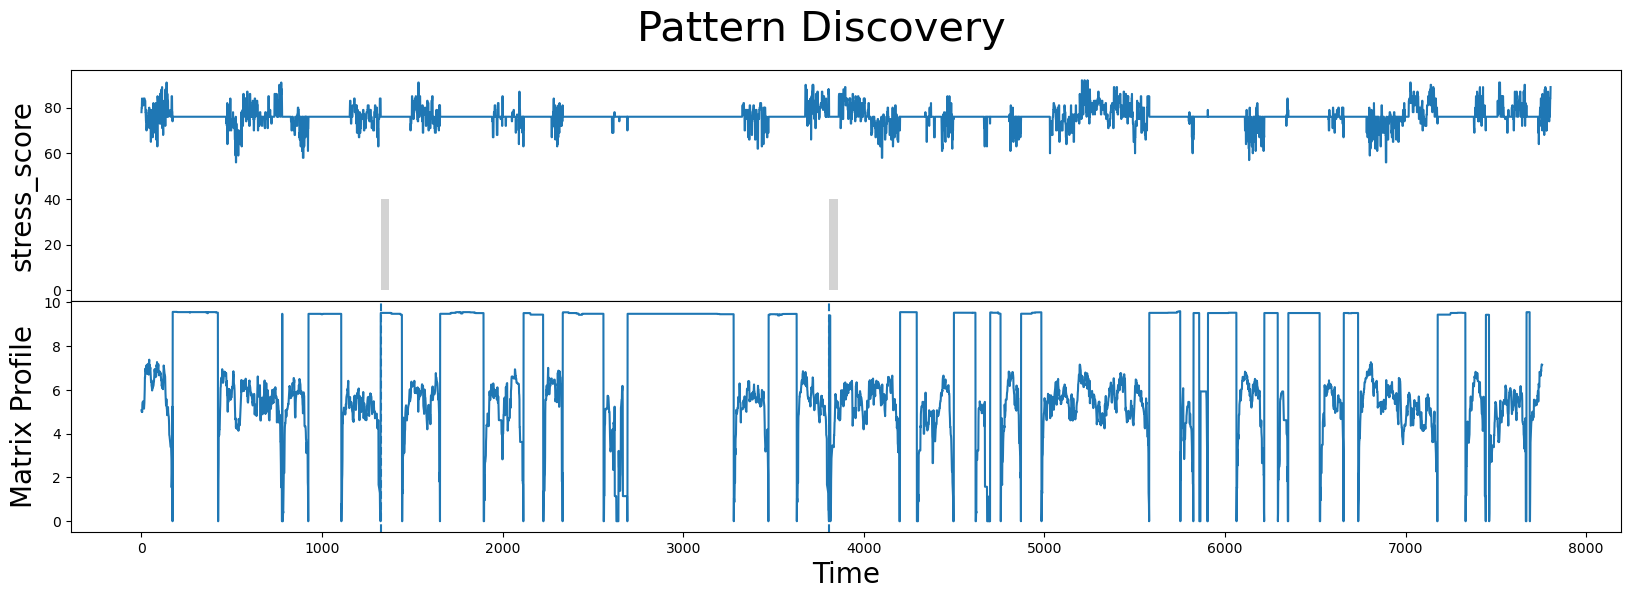

7.127928052423507e-06


In [57]:
pattern_process(data, "stress_score")

# Find motifs within user

In [58]:
data = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,startHour,endHour,startHour_sin,startHour_cos,endHour_sin,endHour_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,...,2,1,3.255517e+07,8892.885057,0.0,9.0,0.000000,1.000000,0.022699,0.999742
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e375b67b776a240290cdc,2021-07-22,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,...,2,1,2.732087e+07,11508.710145,16.0,17.0,0.040347,0.999186,0.042867,0.999081
7800,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,95.9,16.6,81.0,0.700000,0.800,...,2,1,2.732087e+07,11508.710145,0.0,7.0,0.000000,1.000000,0.017656,0.999844
7801,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,95.9,17.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,0.0,8.0,0.000000,1.000000,0.020177,0.999796
7802,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,95.9,18.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,1.0,8.0,0.002522,0.999997,0.020177,0.999796


In [59]:
users = list(data['id'].unique())

The pattern is located at index 0
The nearest neighbor is located at index 23


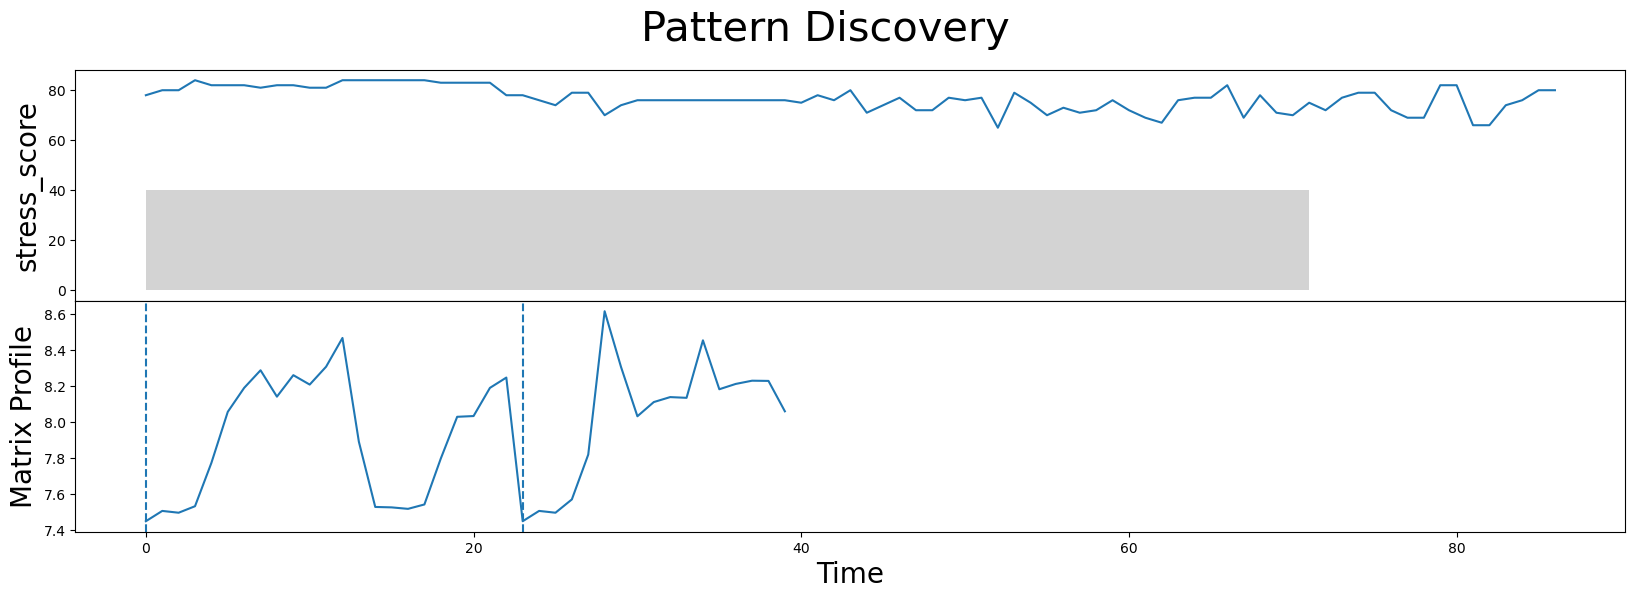

7.448800712770265
The pattern is located at index 1
The nearest neighbor is located at index 37


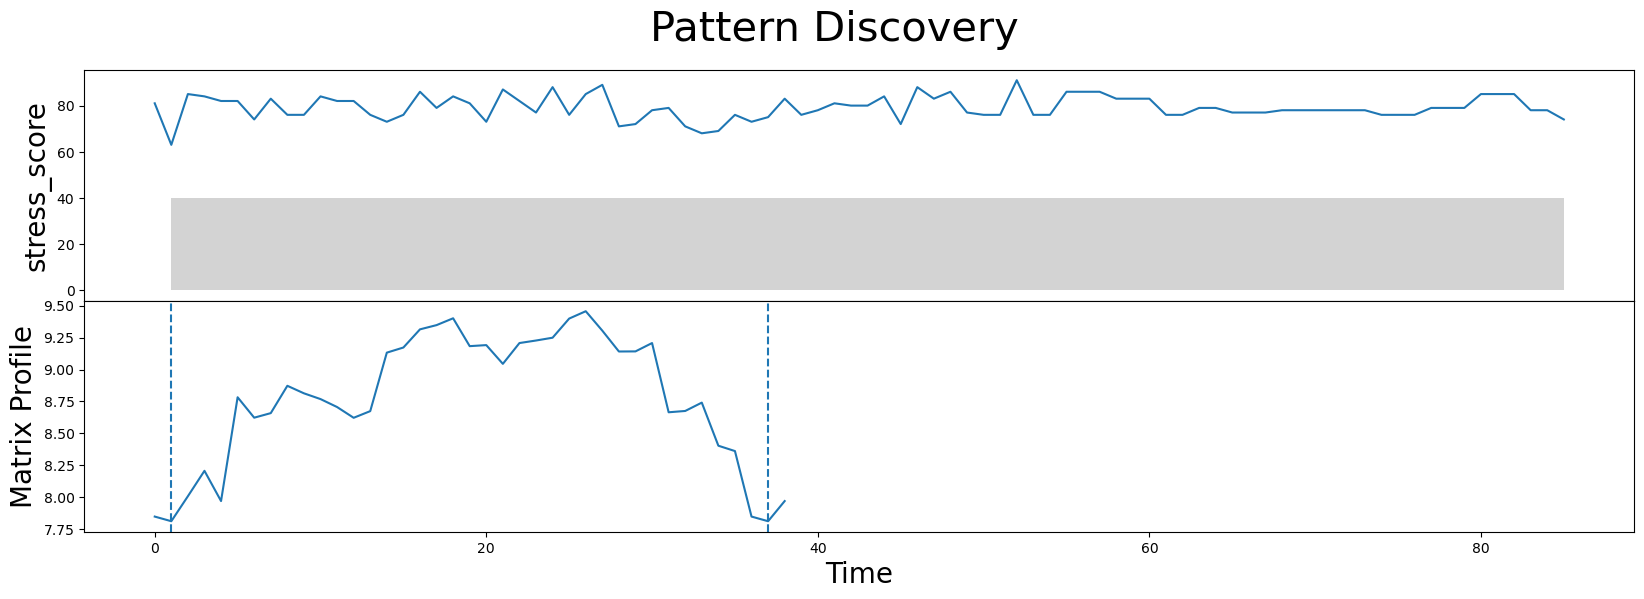

A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


7.811422531794436
The pattern is located at index 0
The nearest neighbor is located at index 13


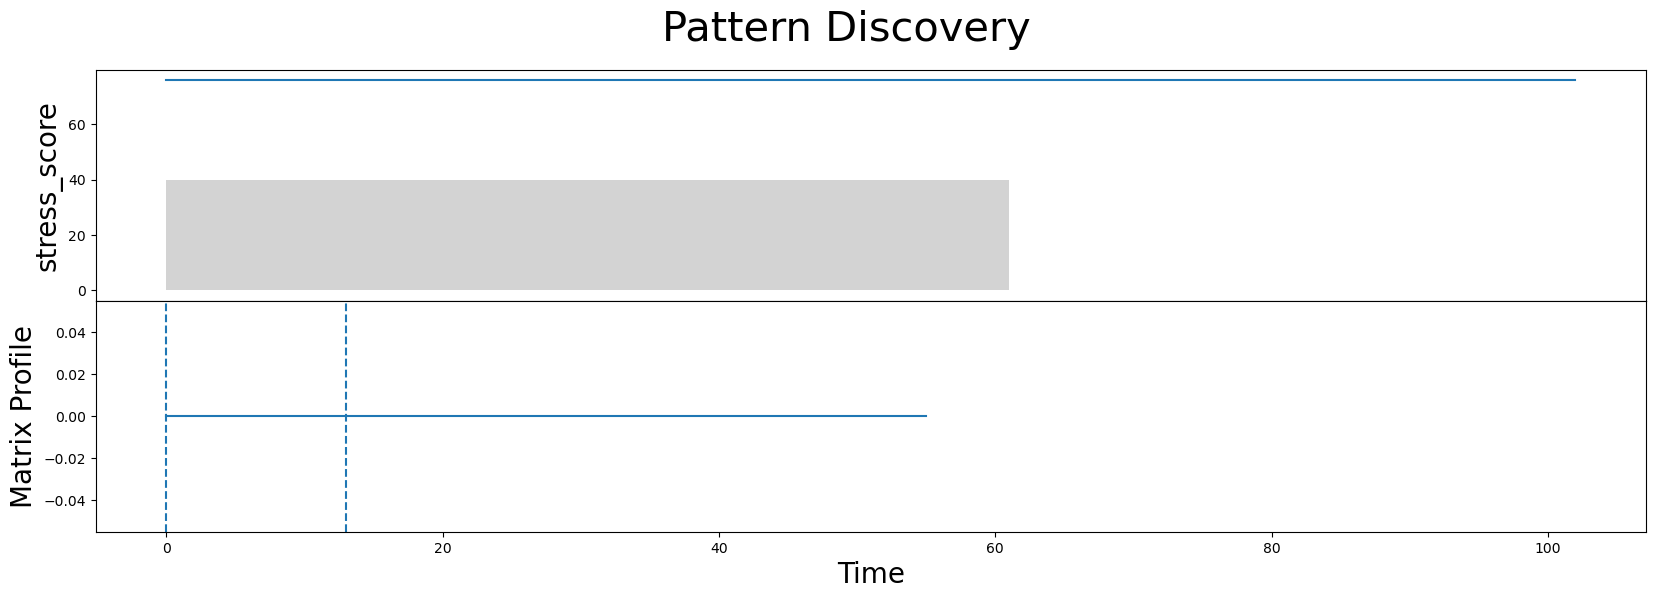

0.0
The pattern is located at index 0
The nearest neighbor is located at index 13


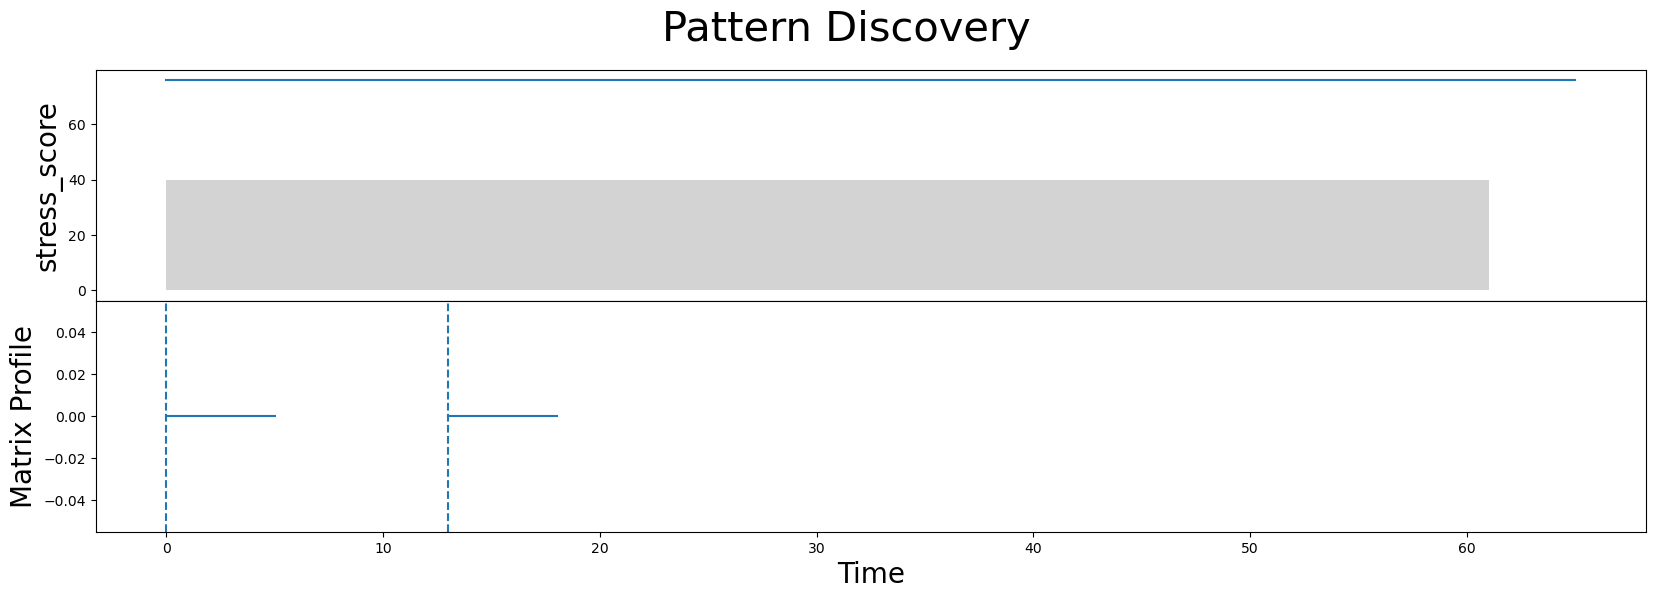

0.0
The pattern is located at index 0
The nearest neighbor is located at index 13


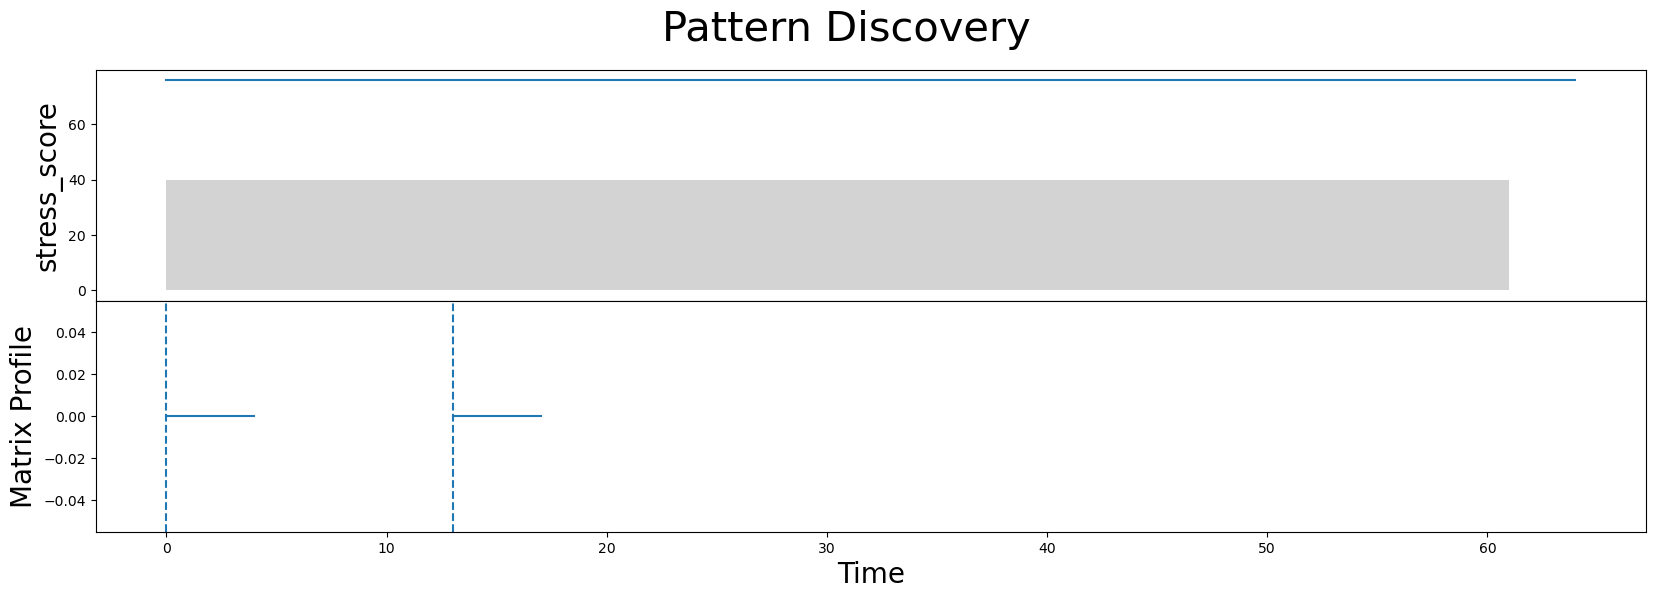

0.0
The pattern is located at index 0
The nearest neighbor is located at index 13


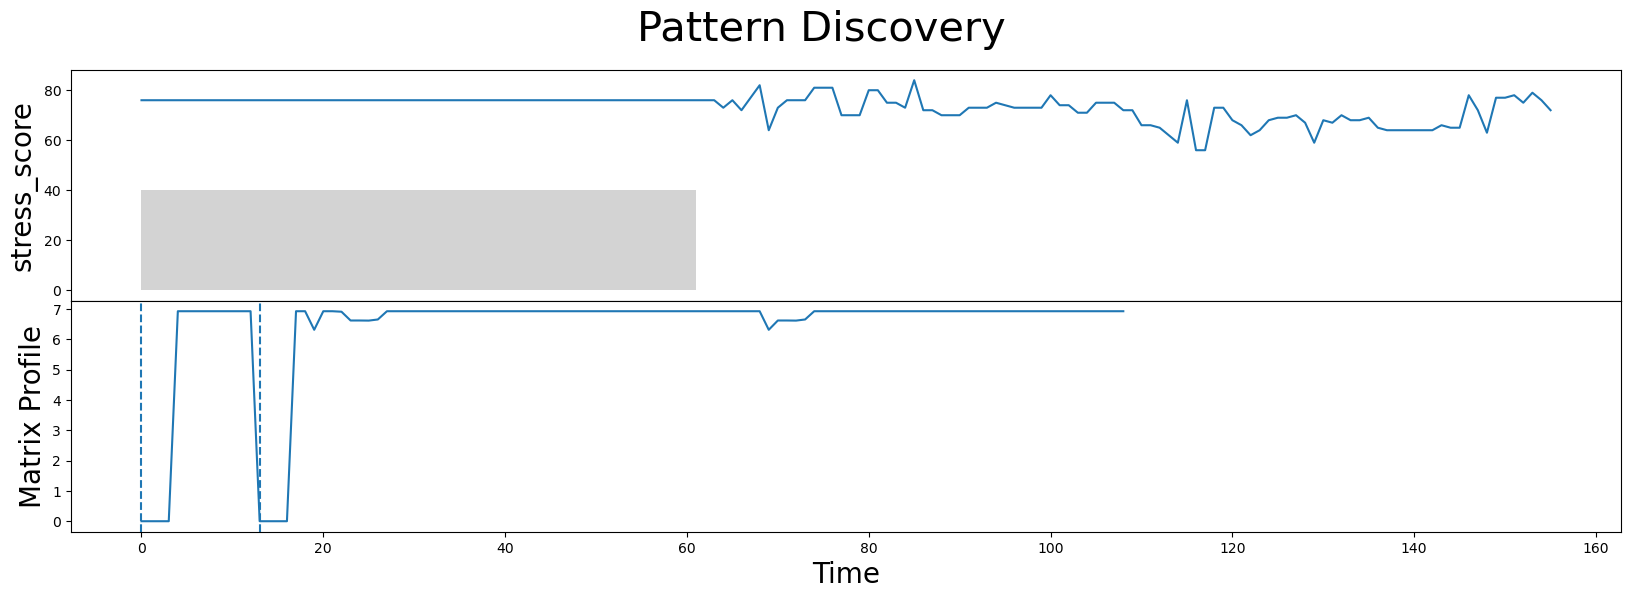

0.0


In [60]:
stop = 0
for user in users:
     user_df = data.loc[data['id'] == user]
     pattern_process(user_df, 'stress_score')
     if stop==5:
         break
     stop = stop + 1

# Find anomalies between users

In [61]:
data = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
data

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,...,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,startHour,endHour,startHour_sin,startHour_cos,endHour_sin,endHour_cos
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,...,2,1,3.255517e+07,8892.885057,0.0,9.0,0.000000,1.000000,0.022699,0.999742
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
2,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,...,2,1,3.255517e+07,8892.885057,23.0,8.0,0.057982,0.998318,0.020177,0.999796
3,621e2e8e67b776a24055b564,2021-05-26,34.611011,57.481,35.216,95.9,14.6,84.0,0.966667,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
4,621e2e8e67b776a24055b564,2021-05-27,34.408304,57.493,35.216,95.9,14.8,82.0,0.933333,0.725,...,2,2,3.255517e+07,8892.885057,23.0,9.0,0.057982,0.998318,0.022699,0.999742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e375b67b776a240290cdc,2021-07-22,33.973120,62.388,35.216,95.9,14.6,76.0,0.766667,0.725,...,2,1,2.732087e+07,11508.710145,16.0,17.0,0.040347,0.999186,0.042867,0.999081
7800,621e375b67b776a240290cdc,2021-07-23,34.011607,55.542,30.813,95.9,16.6,81.0,0.700000,0.800,...,2,1,2.732087e+07,11508.710145,0.0,7.0,0.000000,1.000000,0.017656,0.999844
7801,621e375b67b776a240290cdc,2021-07-24,33.687826,69.579,19.407,95.9,17.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,0.0,8.0,0.000000,1.000000,0.020177,0.999796
7802,621e375b67b776a240290cdc,2021-07-25,34.112386,65.899,22.892,95.9,18.0,84.0,0.833333,0.900,...,2,2,2.732087e+07,11508.710145,1.0,8.0,0.002522,0.999997,0.020177,0.999796


The anomaly is located at index 5747
The nearest neighbor subsequence to this anomaly is 9.596449466654649 units away


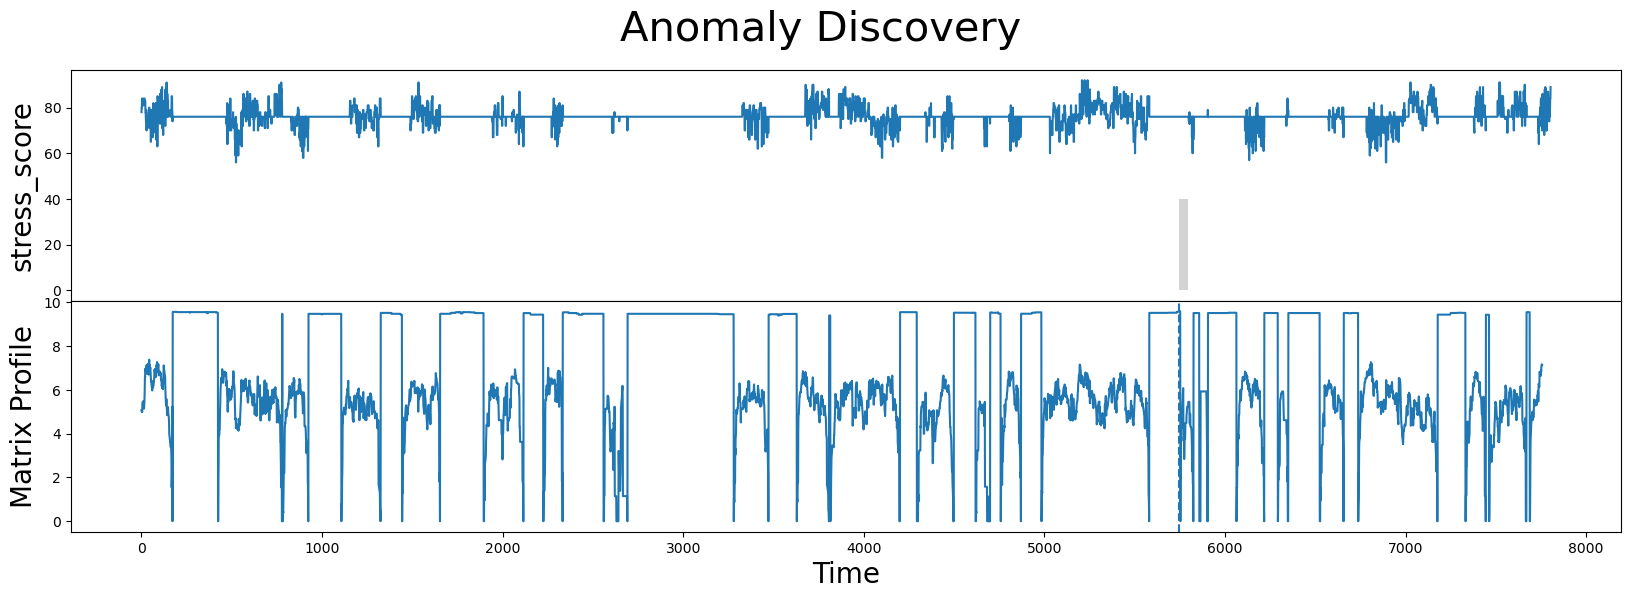

In [62]:
anomaly_process(data, "stress_score")

# Find anomalies within user

In [63]:
users = list(data['id'].unique())

The anomaly is located at index 28
The nearest neighbor subsequence to this anomaly is 8.615039321665483 units away


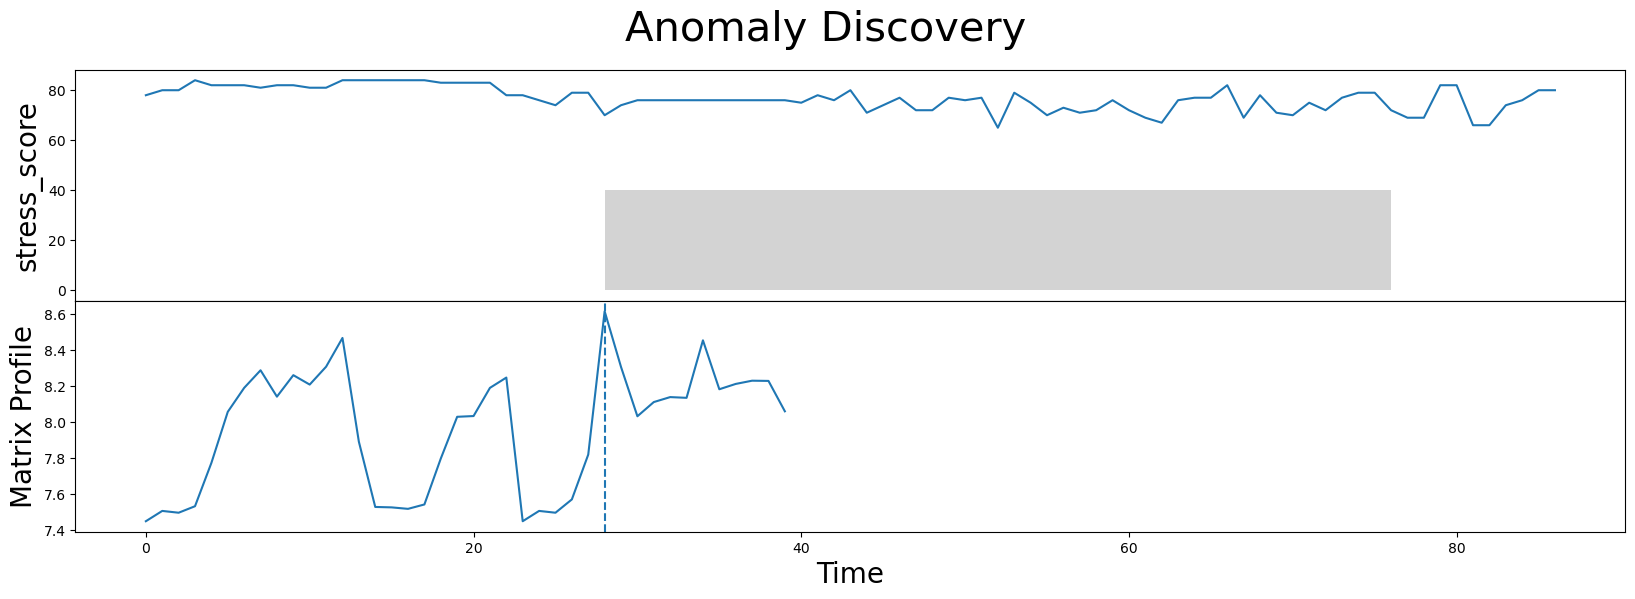

The anomaly is located at index 26
The nearest neighbor subsequence to this anomaly is 9.456776910929081 units away


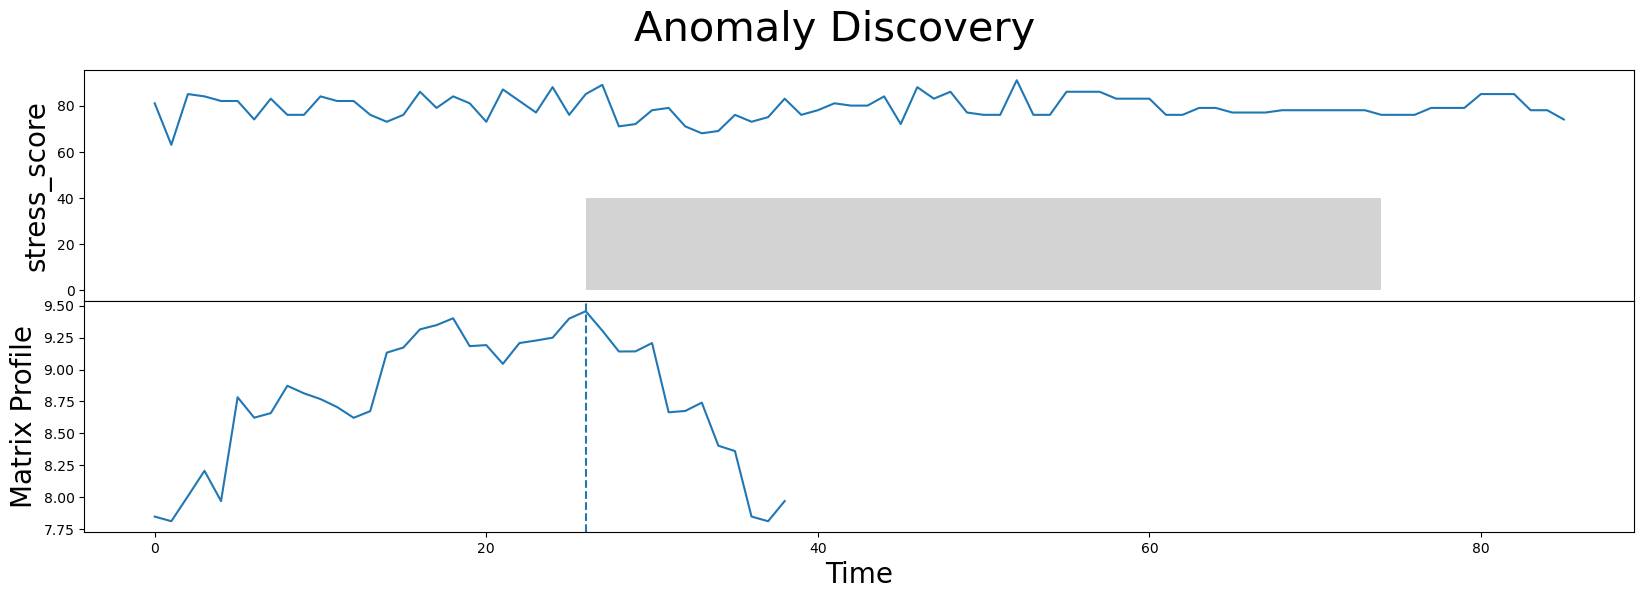

A large number of values are smaller than 1e-05.
For a self-join, try setting `ignore_trivial = True`.


The anomaly is located at index 55
The nearest neighbor subsequence to this anomaly is 0.0 units away


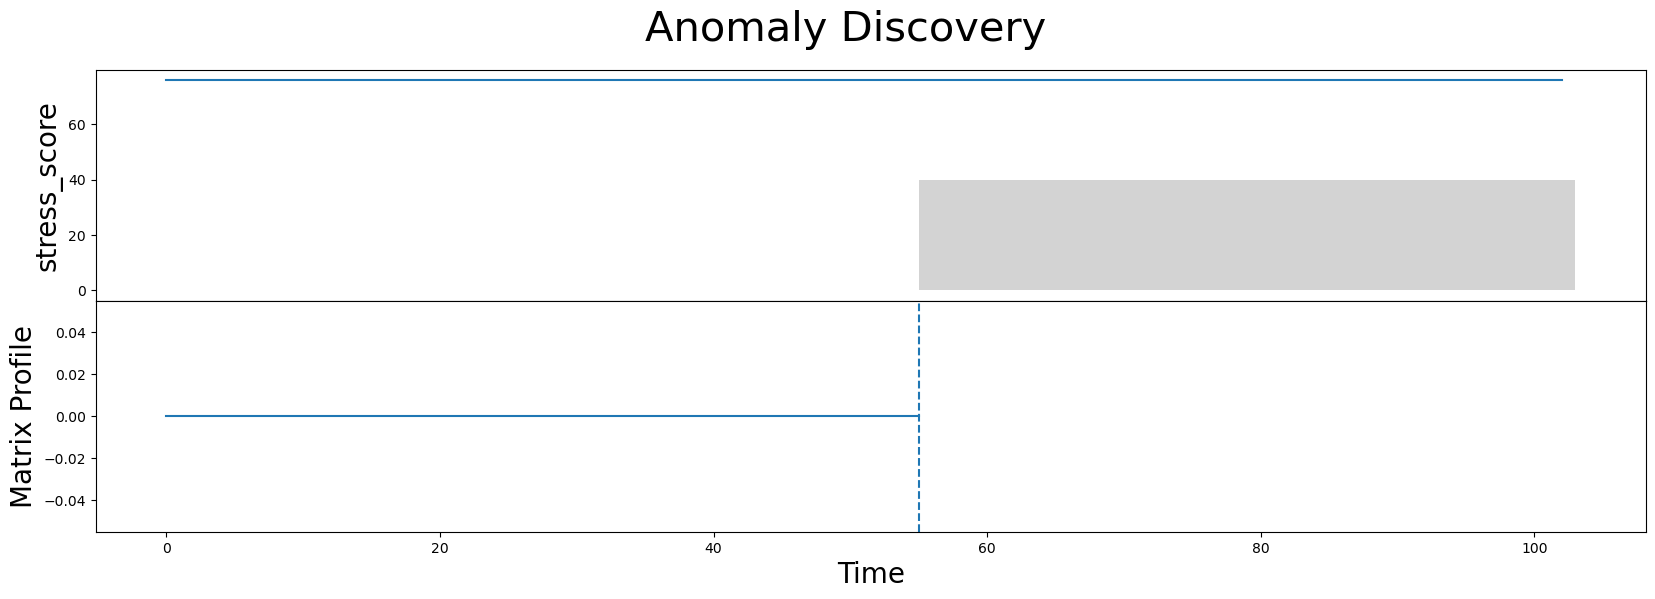

The anomaly is located at index 9
The nearest neighbor subsequence to this anomaly is inf units away


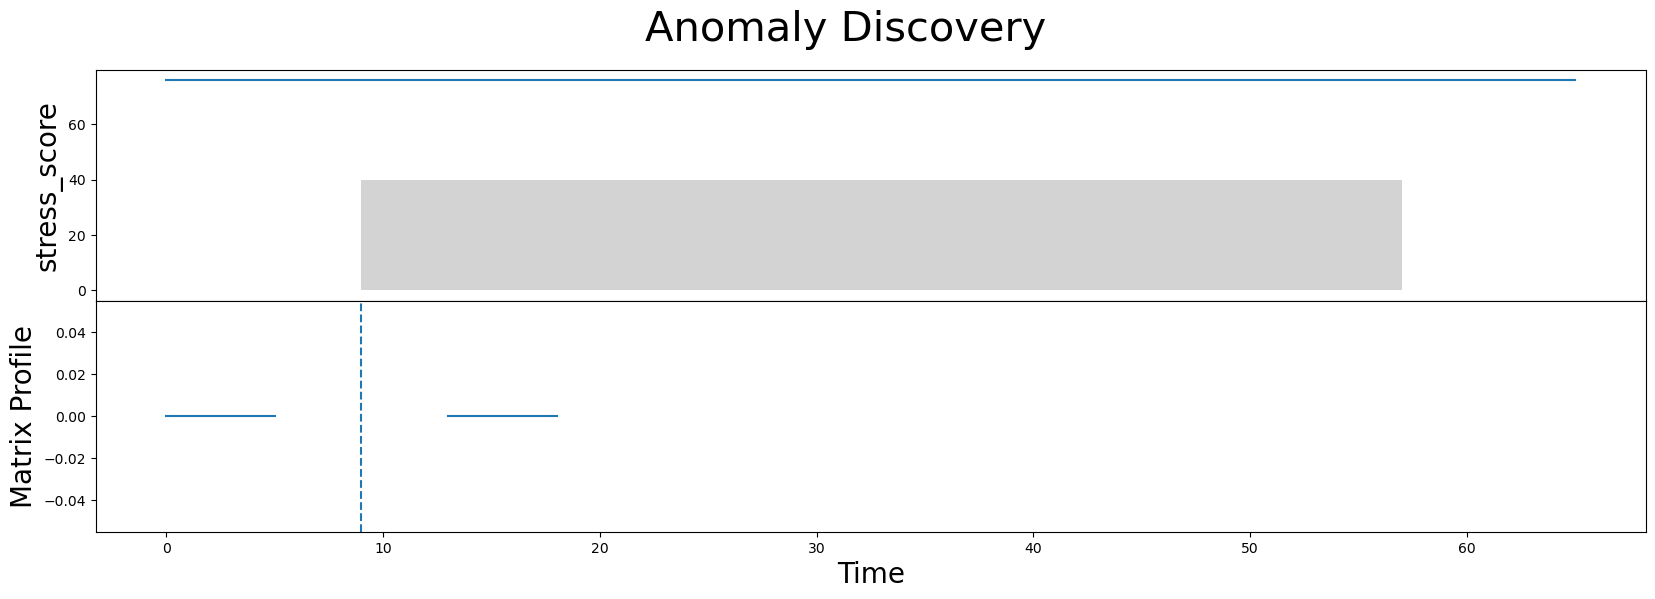

The anomaly is located at index 8
The nearest neighbor subsequence to this anomaly is inf units away


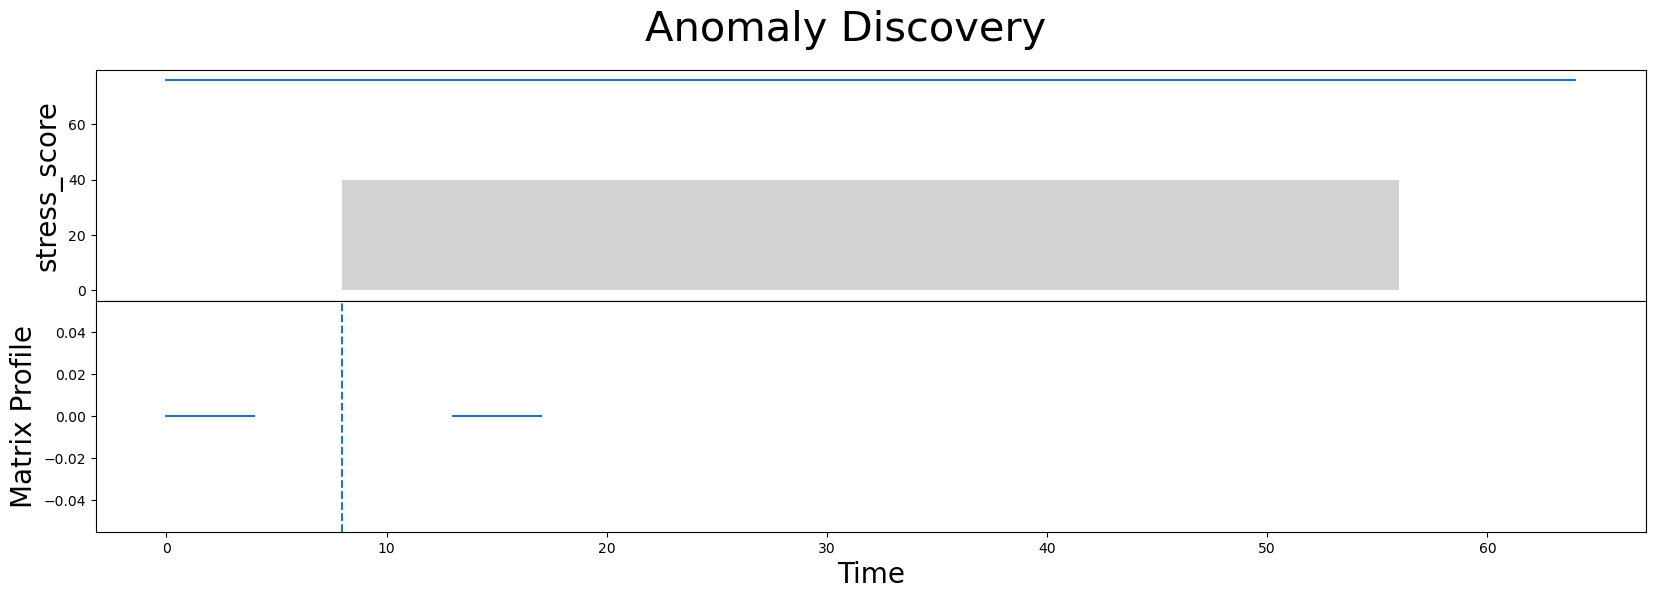

The anomaly is located at index 108
The nearest neighbor subsequence to this anomaly is 6.928203230275509 units away


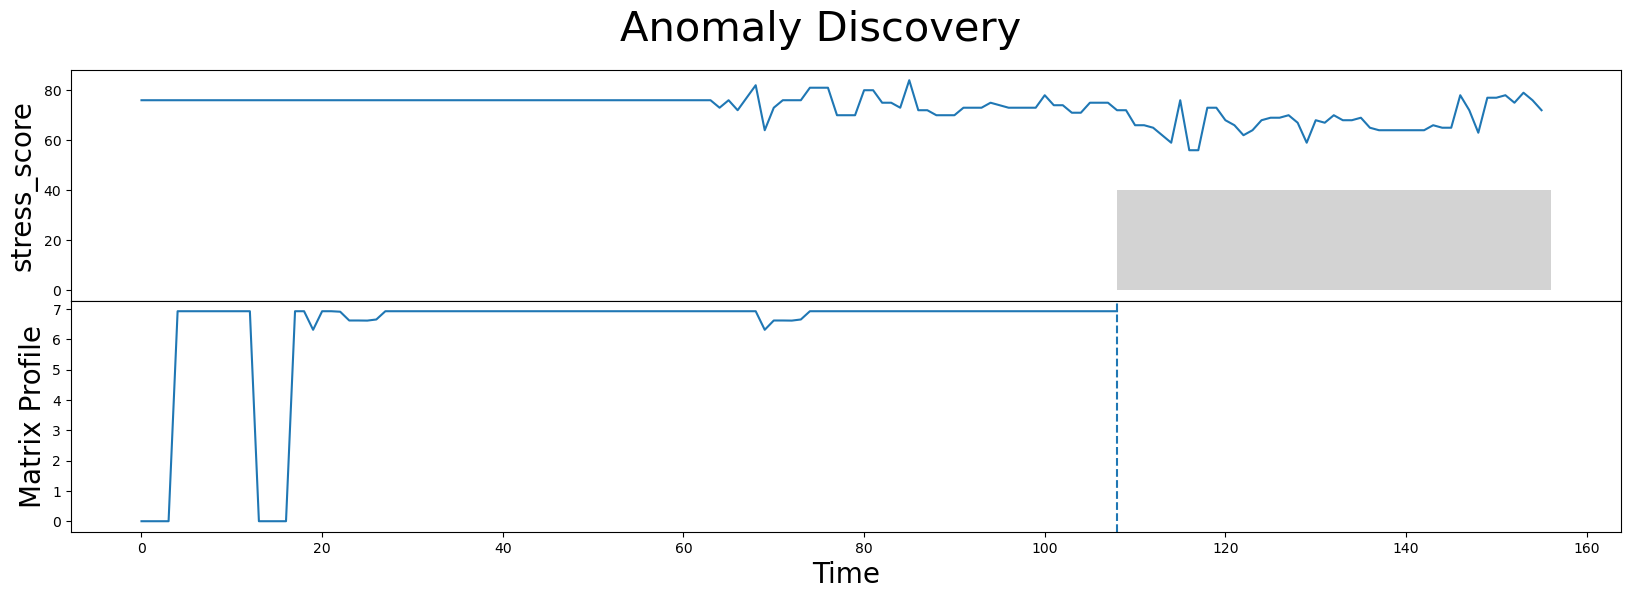

In [64]:
stop = 0
for user in users:
     user_df = data.loc[data['id'] == user]
     anomaly_process(user_df, 'stress_score')
     if stop==5:
         break
     stop = stop + 1